# Regression using RBF Neural Network

# Dataset: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense
import matplotlib .pyplot as plt

## Read Dataset

In [ ]:
df =  pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Mengisi data NULL pada kolom 'horsepower'

In [ ]:
df['horsepower'] = df['horsepower'].replace('?', np.NaN).astype('float64')

In [ ]:
df['horsepower'] = df.groupby(['displacement'], sort=False)['horsepower'].apply(lambda x: x.fillna(x.mean()))
df['horsepower'] = df.groupby(['cylinders'], sort=False)['horsepower'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-71-b77719e4b7f2>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['horsepower'] = df.groupby(['displacement'], sort=False)['horsepower'].apply(lambda x: x.fillna(x.mean()))
<ipython-input-71-b77719e4b7f2>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['horsepower'] = df.gr

In [ ]:
df.loc[[32]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,72.588235,2046,19.0,71,1,ford pinto


## Plot korelasi

<ipython-input-73-3f6c8d58978d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',


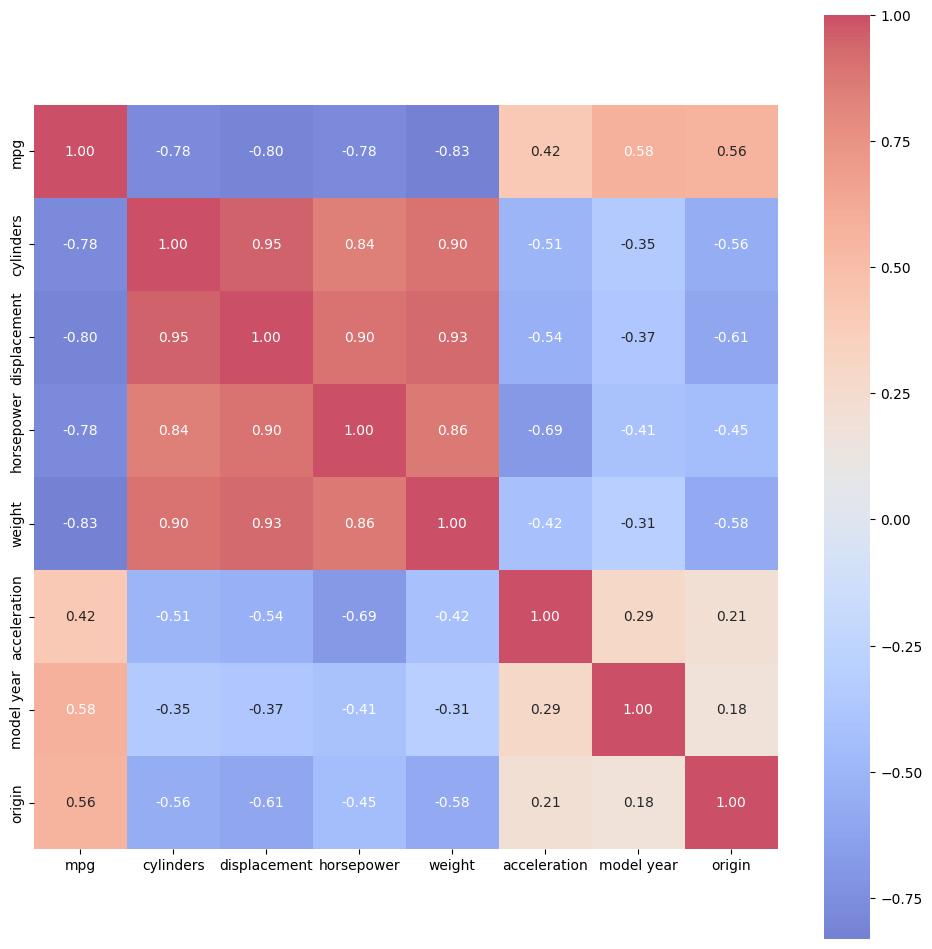

In [ ]:
plt.figure(figsize=(12,12))
sn.heatmap(df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',
           alpha = 0.7,   cmap= 'coolwarm')
plt.show()

## Memisahkan data feature dengan data target

In [ ]:
x_data = df.drop(['mpg', 'car name'], axis=1)
# x_data = df.drop(['mpg', 'car name', 'origin', 'acceleration', 'model year'], axis=1)
x_data

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [ ]:
y_data = df['mpg']
y_data

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

## Normalisasi menggunakan Min-Max Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_data)
x_data2 = scaler.transform(x_data)

x_data2

array([[1.        , 0.61757106, 0.45652174, ..., 0.23809524, 0.        ,
        0.        ],
       [1.        , 0.72868217, 0.64673913, ..., 0.20833333, 0.        ,
        0.        ],
       [1.        , 0.64599483, 0.56521739, ..., 0.17857143, 0.        ,
        0.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, ..., 0.21428571, 1.        ,
        0.        ],
       [0.2       , 0.13436693, 0.17934783, ..., 0.63095238, 1.        ,
        0.        ],
       [0.2       , 0.13178295, 0.19565217, ..., 0.67857143, 1.        ,
        0.        ]])

## Memisahkan antara Train dan Test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x_data2, y_data, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 7)
(120, 7)
(278,)
(120,)


# RBFNN Model

## RBF Keras Library didapatkan dari

> ### Vidnerová, Petra. RBF-Keras: an RBF Layer for Keras Library. 2019. Available at https://github.com/PetraVidnerova/rbf_keras



In [ ]:
from keras import backend as K
from tensorflow.python.keras.layers import Layer
from keras.initializers import RandomUniform, Initializer, Constant
import numpy as np
from keras.initializers import Initializer
from sklearn.cluster import KMeans


class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

In [ ]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

## Model RBF Neural Network

In [ ]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

rbflayer = RBFLayer(278,
                        initializer=InitCentersKMeans(x_train),
                        betas=2.75,
                        input_shape=(7,))

model.add(rbflayer)
model.add(Dense(1, activation="linear"))
model.compile(loss='mean_squared_error', optimizer='RMSprop')
# model.summary()

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9/9 [==============================] - 1s 18ms/step - loss: 569.6887 - val_loss: 583.3116
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 531.6948 - val_loss: 552.9547
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 502.2945 - val_loss: 525.5410
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 475.3590 - val_loss: 499.9628
Epoch 5/1000
9/9 [==============================] - 0s 6ms/step - loss: 449.8390 - val_loss: 475.3290
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 425.2237 - val_loss: 451.2669
Epoch 7/1000
9/9 [==============================] - 0s 6ms/step - loss: 401.1661 - val_loss: 427.5438
Epoch 8/1000
9/9 [==============================] - 0s 6ms/step - loss: 377.7495 - val_loss: 404.6724
Epoch 9/1000
9/9 [==============================] - 0s 8ms/step - loss: 355.0976 - val_loss: 382.3053
Epoch 10/1000
9/9 [==============================] - 0s 6ms/step - loss: 333.1119 - val_loss: 

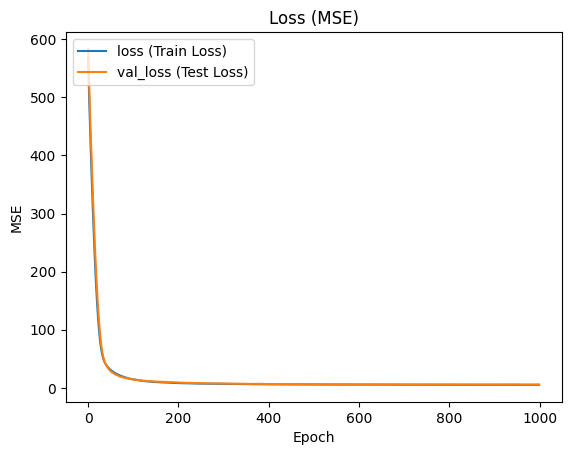

In [ ]:
import matplotlib.pyplot as plt

fitting=model.fit(x_train, y_train, epochs=1000, verbose=1, validation_data=(x_test,y_test))

# pd.DataFrame(fitting.history)["accuracy"].plot(figsize=(8,5))
# plt.title("Perkembangan akurasi tiap Epoch")
# plt.show()

# plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('Loss (MSE)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['loss (Train Loss)', 'val_loss (Test Loss)'], loc='upper left')
plt.show()

In [ ]:
pd.DataFrame(fitting.history)

,loss,val_loss
0,569.688660,583.311646
1,531.694824,552.954712
2,502.294525,525.541016
3,475.359039,499.962769
4,449.838989,475.329010
...,...,...
995,5.034231,5.652471
996,5.024928,5.666092
997,4.944612,5.609666
998,5.004645,5.626575


In [ ]:
model.evaluate(x_train,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 4.8852


4.885236740112305

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.6137


5.613729000091553

## Memprediksi hasil RBFNN

In [ ]:
predictions = model.predict(x_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

4/4 [==============================] - 0s 2ms/step


,Real Values,Predictions
0,26.0,25.650076
1,17.5,16.396894
2,22.3,24.764540
3,31.0,32.186298
4,13.0,14.548831
...,...,...
115,34.1,35.321129
116,17.5,15.403403
117,36.1,34.464172
118,15.0,14.525621


## Perbandingan antara hasil prediksi dengan data yang sebenarnya

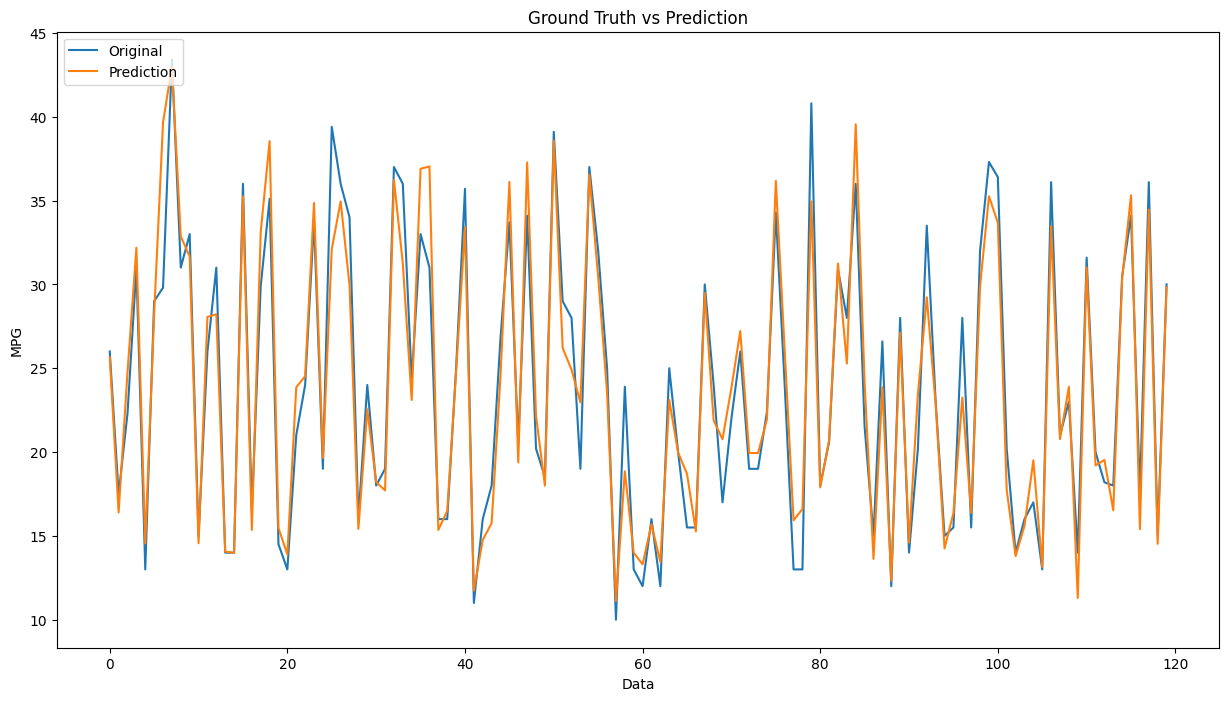

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(comparison_df['Real Values'])
plt.plot(comparison_df['Predictions'])
plt.title('Ground Truth vs Prediction')
plt.ylabel('MPG')
plt.xlabel('Data')
plt.legend(['Original', 'Prediction'], loc='upper left')
plt.show()

## R2 Score (Coefficient of Determination)

In [ ]:
from sklearn.metrics import r2_score

print("Coefficient of Determination =", r2_score(y_test, predictions))

Coefficient of Determination = 0.9192740548859778
